In [1]:
import math
import meep as mp
import numpy as np
from meep import mpb

num_bands = 30

k_points = [mp.Vector3(-0.5),          
            mp.Vector3(0),       
            mp.Vector3(0.5),  
           ]          

k_points = mp.interpolate(4, k_points)

dA = 0.2
dB = 0.8
epsilonA = 13
epsilonB = 2
geometry = []
def BlockAB(N, center):
        geometry = []
        for i in range(N):
            geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                         center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA/2),
                         material=mp.Medium(epsilon=epsilonA)))
            geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                         center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA + dB/2),
                         material=mp.Medium(epsilon=epsilonB)))
        geometry = geometry.tolist()
        return geometry
Np = 1 ## number of repeating
geometry = BlockAB(3,0)
#for i in range (Np):
    #geometry.append(mp.Block(mp.Vector3(0.2),material= mp.Medium(epsilon=13)))

resolution = 32
geometry_lattice = mp.Lattice(size=mp.Vector3(1))
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)
ms.run_te()

Initializing eigensolver data
Computing 30 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,-1.4)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-0.9)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,-0.4)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.1)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0.6)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,1.1)
          size (1e+20,1e+20,0.8)
          axes (1,0,0), (0,1,0),

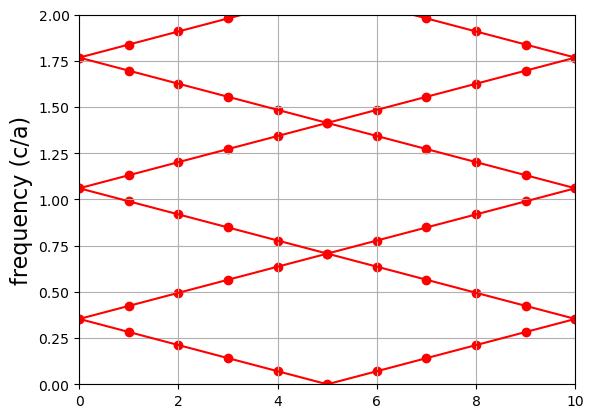

In [2]:
import matplotlib.pyplot as plt

freqs = ms.all_freqs
gaps = ms.gap_list

# 设置DPI值，增大像素
dpi = 100  # 这是一个示例值，可以根据需要调整
fig, ax = plt.subplots(dpi=dpi)

x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz] * len(tz), tz, color='red')
ax.plot(freqs, color='red')
ax.set_ylim([0, 2])
ax.set_xlim([x[0], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)

points_in_between = (len(freqs) - 4) / 3
tick_locs = [i * points_in_between + i for i in range(4)]
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)
#plt.ylim(0,1)
# 显示图形
plt.savefig('bg_13_1_2')
plt.show()